In [1]:
import pandas as pd
import numpy
import sys
import json
import matplotlib.pyplot as plt
numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
dataset = pd.DataFrame(pd.read_csv("steamer.csv", header=None, delimiter="|",names=['steam_id',
                             'url',
                             'name',
                             'desc_snippet',
                             'status',
                             'count',
                             'percentage',
                             'desc',
                             'release_date',
                             'developer',
                             'popular_tags',
                             'game_details',
                             'languages',
                             'genres',
                             'game_description',
                             'mature_content',
                             'minimum_OS',
                             'minimum_Processor',
                             'minimum_Memory',
                             'minimum_Graphics',
                             'minimum_Storage',
                             'minimum_AdditionalNotes',
                             'minimum_DirectX',
                             'minimum_SoundCard',
                             'minimum_Network',
                             'minimum_Minimum',
                             'minimum_Recommended',
                             'recommended_OS',
                             'recommended_Processor',
                             'recommended_Memory',
                             'recommended_Graphics',
                             'recommended_Storage',
                             'recommended_AdditionalNotes',
                             'recommended_DirectX',
                             'recommended_SoundCard',
                             'recommended_Network',
                             'recommended_Minimum',
                             'recommended_Recommended',
                             'original_price',
                             'discount_price']))
dataset

,steam_id,url,name,desc_snippet,status,count,percentage,desc,release_date,developer,...,recommended_Graphics,recommended_Storage,recommended_AdditionalNotes,recommended_DirectX,recommended_SoundCard,recommended_Network,recommended_Minimum,recommended_Recommended,original_price,discount_price
0,379720,https://store.steampowered.com/app/379720/DOOM/,DOOM,Now includes all three premium DLC packs (Unto...,Very Positive,"42,550",92%,550 user reviews for this game are positive.,"May 12, 2016",id Software,...,NVIDIA GTX 970 4GB/AMD Radeon R9 290 4GB or be...,55 GB available space,NaN,NaN,NaN,NaN,NaN,NaN,$19.99,$14.99
1,578080,https://store.steampowered.com/app/578080/PLAY...,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,Mixed,"836,608",49%,608 user reviews for this game are positive.,"Dec 21, 2017",PUBG Corporation,...,NVIDIA GeForce GTX 1060 3GB / AMD Radeon RX 58...,NaN,NaN,Version 11,NaN,Broadband Internet connection,NaN,NaN,$29.99,NaN
2,637090,https://store.steampowered.com/app/637090/BATT...,BATTLETECH,Take command of your own mercenary outfit of '...,Mostly Positive,"7,030",71%,030 user reviews for this game are positive.,"Apr 24, 2018",Harebrained Schemes,...,Nvidia® GeForce™ GTX 670 or AMD® Radeon™ R9 28...,35 MB available space,"Multiplayer is compatible between Windows, Ma...",Version 11,DirectX 9 sound device,Broadband Internet connection,NaN,Requires a 64-bit processor and operating system,$39.99,NaN
3,221100,https://store.steampowered.com/app/221100/DayZ/,DayZ,The post-soviet country of Chernarus is struck...,Mixed,"167,115",61%,115 user reviews for this game are positive.,"Dec 13, 2018",Bohemia Interactive,...,NVIDIA GeForce GTX 1060 or AMD RX 580,25 GB available space,NaN,Version 11,DirectX®-compatible,NaN,NaN,NaN,$44.99,NaN
4,8500,https://store.steampowered.com/app/8500/EVE_On...,EVE Online,EVE Online is a community-driven spaceship MMO...,Mostly Positive,"11,481",74%,481 user reviews for this game are positive.,"May 6, 2003",CCP,...,NaN,"20 GB free space, Video:, NVIDIA Geforce GTX 1...",NaN,NaN,NaN,ADSL connection or faster,NaN,NaN,Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38005,899836,https://store.steampowered.com/app/899836/Rock...,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,...,512MB Nvidia GT 240 or 512 MB ATI Radeon HD 5670,12 GB HD space,NaN,NaN,NaN,NaN,NaN,NaN,$2.99,NaN
38006,899832,https://store.steampowered.com/app/899832/Rock...,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,NaN,NaN,NaN,"Feb 5, 2019",Ubisoft - San Francisco,...,512MB Nvidia GT 240 or 512 MB ATI Radeon HD 5670,12 GB HD space,NaN,NaN,NaN,NaN,NaN,NaN,$2.99,NaN
38007,906840,https://store.steampowered.com/app/906840/Fant...,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,NaN,NaN,NaN,"Jul 31, 2018","SmiteWorks USA, LLC",...,DirectX 9.0 compatible video adapter,2 GB available space,Requirements vary by the add-ons installed and...,Version 9.0c,A sound card is required for voice communicati...,Broadband Internet connection,NaN,NaN,$7.99,NaN
38008,906635,https://store.steampowered.com/app/906635/Mega...,Mega Man X5 Sound Collection,NaN,NaN,NaN,NaN,NaN,"Jul 24, 2018","CAPCOM CO., LTD",...,NVIDIA® GeForce® GTX 760,7000 MB available space,NaN,Version 11,DirectSound (DirectX® 10.0c or better),NaN,NaN,NaN,$9.99,NaN


In [3]:
count_rows = len(dataset)
count_rows

38010

In [10]:
type(dataset["genres"][0])

str

In [4]:
count_genres = {}
for genres in dataset["genres"]:
    if type(genres) is not float:
        for genre in genres.split(','):
            genre = genre.replace('[','').replace(']','').replace('\'','').strip()
            if genre != '':
                if genre not in count_genres.keys():
                    count_genres[genre] = (1,100/count_rows)
                else:
                    value = count_genres[genre][0]
                    value += 1
                    count_genres[genre] = (value, 100*value/count_rows)
                
count_genres = sorted(count_genres.items(), key=lambda count_genres: count_genres[1][1], reverse=True)
count_genres

[('Indie', (22868, 60.163114969744804)),
 ('Action', (15264, 40.15785319652723)),
 ('Casual', (12010, 31.596948171533807)),
 ('Adventure', (11870, 31.228624046303604)),
 ('Simulation', (8711, 22.917653249144962)),
 ('Strategy', (7975, 20.98132070507761)),
 ('RPG', (6962, 18.31623257037622)),
 ('Early Access', (2818, 7.413838463562221)),
 ('Free to Play', (2620, 6.892922915022362)),
 ('Sports', (1725, 4.538279400157853)),
 ('Racing', (1384, 3.641147066561431)),
 ('Massively Multiplayer', (1277, 3.359642199421205)),
 ('Design & Illustration', (622, 1.6364114706656143)),
 ('Utilities', (454, 1.1944225203893712)),
 ('Web Publishing', (420, 1.1049723756906078)),
 ('Animation & Modeling', (241, 0.6340436727177059)),
 ('Education', (168, 0.4419889502762431)),
 ('Video Production', (150, 0.39463299131807417)),
 ('Audio Production', (125, 0.3288608260983952)),
 ('Software Training', (110, 0.2893975269665877)),
 ('Photo Editing', (67, 0.17626940278873982)),
 ('Game Development', (65, 0.171007629

In [5]:
count_popular_tags = {}
for popular_tags in dataset["popular_tags"]:
    if type(popular_tags) is not float:
        for popular_tag in popular_tags.split(','):
            popular_tag = popular_tag.replace('[','').replace(']','').replace('\'','').strip()
            if popular_tag != '':
                if popular_tag not in count_popular_tags.keys():
                    count_popular_tags[popular_tag] = (1,100/count_rows)
                else:
                    value = count_popular_tags[popular_tag][0]
                    value += 1
                    count_popular_tags[popular_tag] = (value, 100*value/count_rows)
                
count_popular_tags = sorted(count_popular_tags.items(), key=lambda count_popular_tags: count_popular_tags[1], reverse=True)
count_popular_tags

[('Indie', (23718, 62.39936858721389)),
 ('Action', (16111, 42.386214154169956)),
 ('Adventure', (13377, 35.193370165745854)),
 ('Casual', (12969, 34.119968429360696)),
 ('Simulation', (9273, 24.396211523283345)),
 ('Strategy', (8586, 22.588792423046566)),
 ('RPG', (7362, 19.368587213891082)),
 ('Singleplayer', (6771, 17.81373322809787)),
 ('Early Access', (6247, 16.435148645093395)),
 ('Great Soundtrack', (3209, 8.442515127598)),
 ('Atmospheric', (3134, 8.245198631938964)),
 ('2D', (3056, 8.039989476453565)),
 ('Multiplayer', (3045, 8.011049723756907)),
 ('Puzzle', (2897, 7.621678505656406)),
 ('Free to Play', (2886, 7.592738752959748)),
 ('VR', (2410, 6.3404367271770585)),
 ('Violent', (2354, 6.193107077084978)),
 ('Story Rich', (2264, 5.956327282294133)),
 ('Difficult', (2088, 5.4932912391475925)),
 ('Fantasy', (2066, 5.435411733754275)),
 ('Gore', (1943, 5.111812680873454)),
 ('Horror', (1890, 4.972375690607735)),
 ('Anime', (1864, 4.903972638779269)),
 ('Sports', (1811, 4.76453564

In [9]:
count_game_details = {}
for game_details in dataset["game_details"]:
    if type(game_details) is not float:
        for game_detail in game_details.split(','):
            game_detail = game_detail.replace('[','').replace(']','').replace('\'','').replace('\\xa0\\r\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t','').strip()
            if game_detail != '':
                if game_detail not in count_game_details.keys():
                    count_game_details[game_detail] = (1,100/count_rows)
                else:
                    value = count_game_details[game_detail][0]
                    value += 1
                    count_game_details[game_detail] = (value, 100*value/count_rows)
                
count_game_details = sorted(count_game_details.items(), key=lambda count_game_details: count_game_details[1], reverse=True)
count_game_details

[('Single-player', (33796, 88.9134438305709)),
 ('Steam Achievements', (19890, 52.32833464877664)),
 ('Downloadable Content', (13169, 34.64614575111813)),
 ('Steam Cloud', (11769, 30.9629044988161)),
 ('Steam Trading Cards', (11586, 30.48145224940805)),
 ('Full controller support', (8975, 23.612207313864772)),
 ('Profile Features Limited', (8443, 22.212575637990003)),
 ('Multi-player', (8386, 22.062615101289133)),
 ('Partial Controller Support', (7080, 18.6266771902131)),
 ('Steam Leaderboards', (6142, 16.158905551170744)),
 ('Co-op', (4462, 11.739016048408313)),
 ('Online Multi-Player', (4152, 10.923441199684294)),
 ('Shared/Split Screen', (4038, 10.623520126282557)),
 ('Stats', (2615, 6.879768481978426)),
 ('Cross-Platform Multiplayer', (2572, 6.766640357800579)),
 ('Steam is learning about this game', (2260, 5.945803735858984)),
 ('Local Multi-Player', (2132, 5.609050249934228)),
 ('Steam Workshop', (2007, 5.280189423835833)),
 ('Online Co-op', (1942, 5.109181794264667)),
 ('Include

In [63]:
count_developers = {}
for developer in dataset["developer"]:
    if type(developer) is not float:
        developer = developer.replace('[','').replace(']','').replace('\'','').strip()
        if developer != '':
            if developer not in count_developers.keys():
                count_developers[developer] = (1,100/count_rows)
            else:
                value = count_developers[developer][0]
                value += 1
                count_developers[developer] = (value, 100*value/count_rows)
                
count_developers = sorted(count_developers.items(), key=lambda count_developers: count_developers[1][1], reverse=True)
count_developers


[('Ubisoft - San Francisco', (1041, 2.7387529597474347)),
 ('SmiteWorks USA, LLC', (774, 2.0363062352012626)),
 ('KOEI TECMO GAMES CO., LTD.', (456, 1.1996842936069456)),
 ('Dovetail Games', (187, 0.49197579584319917)),
 ('N3V Games', (122, 0.3209681662720337)),
 ('Sly', (122, 0.3209681662720337)),
 ('Choice of Games', (117, 0.30781373322809785)),
 ('Capcom', (116, 0.3051828466193107)),
 ('Paradox Development Studio', (116, 0.3051828466193107)),
 ('CAPCOM Co., Ltd.', (98, 0.2578268876611418)),
 ('Milestone S.r.l.', (97, 0.2551960010523546)),
 ('Stainless Games', (94, 0.24730334122599315)),
 ('Square Enix,KOEI TECMO GAMES CO., LTD.', (87, 0.22888713496448304)),
 ('Musopia', (87, 0.22888713496448304)),
 ('Ronimo Games', (86, 0.22625624835569588)),
 ('Arc System Works', (77, 0.20257826887661143)),
 ('TAITO CORP.', (73, 0.19205472244146277)),
 ('SCS Software', (66, 0.17363851617995266)),
 ('DL Softworks', (63, 0.16574585635359115)),
 ('Relic Entertainment,Feral Interactive (Mac),Feral Inte

In [64]:
count_genres = {}
i = 0
for genres in dataset["genres"]:
    if type(genres) is not float:
        genres_array = json.loads(genres.replace('\'','"'))
        for genre in genres_array:
            p = dataset["percentage"][i]
            if type(p) is not float:
                if genre in count_genres.keys():
                    ps = int(str(p).replace("%", "")) + count_genres[genre]["percentage_sum"]
                    c = count_genres[genre]["count"] + 1
                    count_genres[genre] = {"percentage_sum": ps, "count": c, 'percentage_avg': 0}
                else:
                    ps = int(str(p).replace("%", ""))
                    count_genres[genre] = {"percentage_sum": ps, "count": 1, 'percentage_avg': 0}
    i = i + 1

for genre in count_genres:
    count_genres[genre]['percentage_avg'] = count_genres[genre]['percentage_sum'] / count_genres[genre]['count']

count_genres


{'Action': {'percentage_sum': 559436,
  'count': 7530,
  'percentage_avg': 74.29428950863213},
 'Adventure': {'percentage_sum': 458672,
  'count': 6131,
  'percentage_avg': 74.81193932474311},
 'Massively Multiplayer': {'percentage_sum': 43362,
  'count': 672,
  'percentage_avg': 64.52678571428571},
 'Strategy': {'percentage_sum': 263702,
  'count': 3665,
  'percentage_avg': 71.95143246930422},
 'Free to Play': {'percentage_sum': 103160,
  'count': 1444,
  'percentage_avg': 71.4404432132964},
 'RPG': {'percentage_sum': 239303,
  'count': 3210,
  'percentage_avg': 74.54922118380063},
 'Indie': {'percentage_sum': 796475,
  'count': 10526,
  'percentage_avg': 75.66739502185065},
 'Early Access': {'percentage_sum': 99900,
  'count': 1410,
  'percentage_avg': 70.85106382978724},
 'Simulation': {'percentage_sum': 280510,
  'count': 3971,
  'percentage_avg': 70.63963737093931},
 'Racing': {'percentage_sum': 47360,
  'count': 664,
  'percentage_avg': 71.32530120481928},
 'Casual': {'percentage

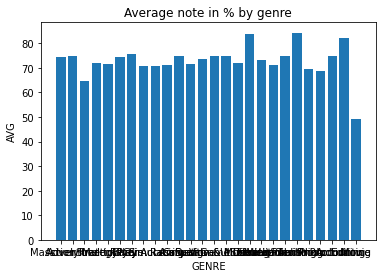

In [65]:
%matplotlib inline

genre_df = {}
for genre in count_genres:
    genre_df[genre] = count_genres[genre]['percentage_avg']

plt.bar(genre_df.keys(), genre_df.values())
plt.xlabel("GENRE")
plt.ylabel("AVG")
plt.title("Average note in % by genre")
plt.show()
